x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration0/300:loss1.000029
iteration10/300:loss0.889846
iteration20/300:loss0.869040
iteration30/300:loss0.852450
iteration40/300:loss0.830404
iteration50/300:loss0.810558
iteration60/300:loss0.799046
iteration70/300:loss0.794072
iteration80/300:loss0.791872
iteration90/300:loss0.790516
iteration100/300:loss0.789448
iteration110/300:loss0.788536
iteration120/300:loss0.787737
iteration130/300:loss0.787026
iteration140/300:loss0.786386
iteration150/300:loss0.785804
iteration160/300:loss0.785272
iteration170/300:loss0.784784
iteration180/300:loss0.784332
iteration190/300:loss0.783913
iteration200/300:loss0.783522
iteration210/300:loss0.783157
iteration220/300:loss0.782814
iteration230/300:loss0.782492
iteration240/300:loss0.782187
iteration250/300:loss0.781900
iteration260/300:loss0.781627
iteration270/300:loss0.781368
iteration280/300:loss0.781121
iteration290/300:loss0.780886


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

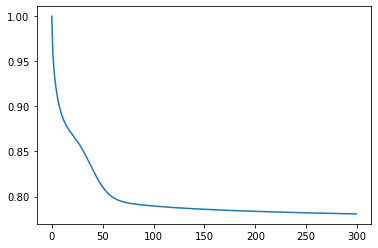

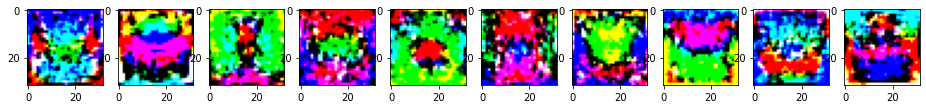

x_train-> (50000, 3072)
train_loss= 0.780660970099639
train_acc= 0.7570066666666667
x_test-> (10000, 3072)
test_loss= 0.7865654659335929
test_acc= 0.7495444444444445


In [15]:
#item1
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations = 300 # number of epochs
lr =1.851e-2 # learning rate
lr_decay=0.999 #learning rate decay value
reg =5e-6 # regularization parameter
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x=x_train[indices]
    y=y_train[indices]
    y_pred=x.dot(w1)+b1 # predicted value of y
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*np.sum(w1*w1) # loss function
    loss_history.append(loss) 

    if t%10==0:
        print('iteration%d/%d:loss%f'%(t,iterations,loss)) 

    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y) # Partial derivative of loss w.r.t predicted value of y
    dw1=x.T.dot(dy_pred)+reg*w1 # Partial derivative of loss w.r.t w1
    db1=dy_pred.sum(axis=0) # Partial derivative of loss w.r.t b1

    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay
    
# Printing accuracies and displaying w as images
plt.plot(loss_history)
f,axarr = plt.subplots(1,10)
f.set_size_inches(16,6)
for i in range (10):
    img=w1[:,i].reshape(32,32,3)#CIFAR10
    axarr[i].imshow(img*1000)
plt.show()
x_t=x_train
print("x_train->",x_t.shape)
y_pred=x_t.dot(w1)+b1
train_loss=1./Ntr*np.square(y_pred-y_train).sum()+reg*np.sum(w1*w1) # calculating the training loss 
train_acc=1.0-(1./(Ntr*(K-1))*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum())# calculating the training accuracy
print("train_loss=",train_loss)
print("train_acc=",train_acc)

x_t=x_test
print("x_test->",x_t.shape)
y_pred=x_t.dot(w1)+b1
test_loss=1./Nte*np.square(y_pred-y_test).sum()+reg*np.sum(w1*w1) # calculating the testing loss 
test_acc=1.0-(1./(Nte*(K-1))*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum())# calculating the testing accuracy
print("test_loss=",test_loss)
print("test_acc=",test_acc)



x_train:  (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration0/300:loss1.000014
iteration10/300:loss0.898301
iteration20/300:loss0.857086
iteration30/300:loss0.833610
iteration40/300:loss0.827157
iteration50/300:loss0.817893
iteration60/300:loss0.812223
iteration70/300:loss0.802302
iteration80/300:loss0.796794
iteration90/300:loss0.796664
iteration100/300:loss0.784561
iteration110/300:loss0.787650
iteration120/300:loss0.776413
iteration130/300:loss0.778511
iteration140/300:loss0.771348
iteration150/300:loss0.770874
iteration160/300:loss0.771756
iteration170/300:loss0.767565
iteration180/300:loss0.761357
iteration190/300:loss0.761142
iteration200/300:loss0.751480
iteration210/300:loss0.757156
iteration220/300:loss0.752958
iteration230/300:loss0.746160
iteration240/300:loss0.739184
iteration250/300:loss0.744289
iteration260/300:loss0.742728
iteration270/300:loss0.736503
iteration280/300:loss0.736281
iteration290/300:loss0.735240


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

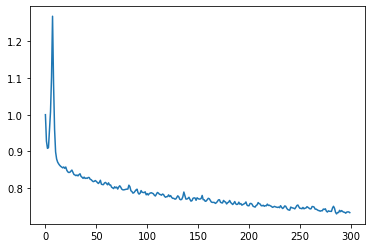

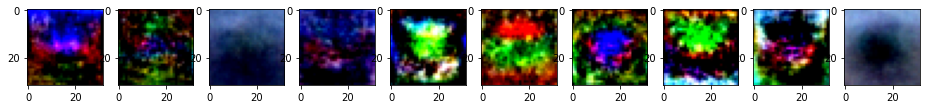

x_train-> (50000, 3072)
train_loss= 0.7350797314983936
train_acc= 0.7776422222222222
x_test-> (10000, 3072)
test_loss= 0.7580410061934775
test_acc= 0.7667222222222222


In [13]:
#item2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
H=200 # number of hidden nodes
std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr
iterations = 300 # number of epochs
lr =1.5e-2 #learning rate
lr_decay=0.999 #learning rate decay value
reg =5e-6 # regularization parameter
loss_history = []
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    batch_indices=np.random.choice(Ntr,batch_size)
    # Forward pass
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1))) #sigmoid function
    y_pred=h.dot(w2)+b2 # predicted value of y
    loss=(1./batch_size*np.square(y_pred-y).sum())+reg*(np.sum(w2*w2)+np.sum(w1*w1)) #loss function
    loss_history.append(loss)

    if t%10==0:
        print('iteration%d/%d:loss%f'%(t,iterations,loss))

    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y) # Partial derivative of loss w.r.t predicted value of y
    dw2=h.T.dot(dy_pred)+reg*w2 # Partial derivative of loss w.r.t predicted value of w2
    db2=dy_pred.sum(axis=0) # Partial derivative of loss w.r.t predicted value of b2
    dh=dy_pred.dot(w2.T)  # Partial derivative of loss w.r.t predicted value of h
    dw1=x.T.dot(dh*h*(1-h))+reg*w1 # Partial derivative of loss w.r.t predicted value of w1
    db1=(dh*h*(1-h)).sum(axis=0) # Partial derivative of loss w.r.t predicted value of b1

    w2-=lr*dw2
    w1-=lr*dw1
    b1-=lr*db1
    b2-=lr*db2
    lr*=lr_decay
    
# Printing accuracies and displaying w as images
plt.plot(loss_history)
f,axarr = plt.subplots(1,10)
f.set_size_inches(16,6)
for i in range (10):
    img=w1[:,i].reshape(32,32,3)#CIFAR10
    axarr[i].imshow(img*1000)
plt.show()
x_t=x_train
print("x_train->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))#sigmoid
y_pred=h.dot(w2)+b2
train_loss=1./Ntr*np.square(y_pred-y_train).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1)) # calculating the training loss
#calculating the training accuracy
train_acc=1.0-(1./(Ntr*(K-1))*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum())
print("train_loss=",train_loss)
print("train_acc=",train_acc)

x_t=x_test
print("x_test->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))#sigmoid
y_pred=h.dot(w2)+b2
test_loss=1./Nte*np.square(y_pred-y_test).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1)) # calculating the testing loss
# calculating the testing accuracy
test_acc=1.0-(1./(Nte*(K-1))*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum())
print("test_loss=",test_loss)
print("test_acc=",test_acc)

x_train:  (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration0/300:loss1.000073
iteration10/300:loss0.876337
iteration20/300:loss0.845351
iteration30/300:loss0.835179
iteration40/300:loss0.823478
iteration50/300:loss0.818638
iteration60/300:loss0.819728
iteration70/300:loss0.811575
iteration80/300:loss0.790415
iteration90/300:loss0.787834
iteration100/300:loss0.785920
iteration110/300:loss0.804430
iteration120/300:loss0.795987
iteration130/300:loss0.798152
iteration140/300:loss0.776081
iteration150/300:loss0.779566
iteration160/300:loss0.773242
iteration170/300:loss0.755623
iteration180/300:loss0.761784
iteration190/300:loss0.786784
iteration200/300:loss0.770764
iteration210/300:loss0.777923
iteration220/300:loss0.773335
iteration230/300:loss0.758431
iteration240/300:loss0.755978
iteration250/300:loss0.774229
iteration260/300:loss0.772061
iteration270/300:loss0.763522
iteration280/300:loss0.750256
iteration290/300:loss0.771716


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

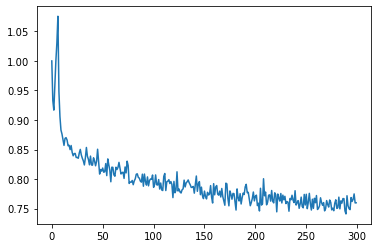

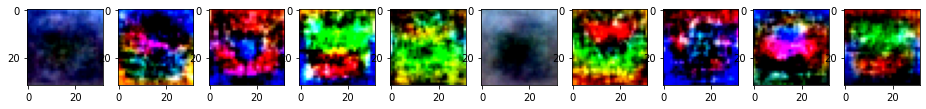

x_train-> (50000, 3072)
train_loss= 0.7558821007720969
train_acc= 0.7756933333333333
x_test-> (10000, 3072)
test_loss= 0.76793624879954
test_acc= 0.7689333333333334


In [14]:
#item3
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
H=200 # number of hidden nodes
std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500
iterations = 300 # number of epochs
lr =1.5e-2 #learning rate
lr_decay=0.999 #learning rate decay value
reg =5e-6 # regularization parameter
loss_history = []
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    batch_indices=np.random.choice(Ntr,batch_size)
    # Forward pass
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1))) #sigmoid function
    y_pred=h.dot(w2)+b2 # predicted value of y
    loss=(1./batch_size*np.square(y_pred-y).sum())+reg*(np.sum(w2*w2)+np.sum(w1*w1)) #loss function
    loss_history.append(loss)

    if t%10==0:
        print('iteration%d/%d:loss%f'%(t,iterations,loss))

    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y) # Partial derivative of loss w.r.t predicted value of y
    dw2=h.T.dot(dy_pred)+reg*w2 # Partial derivative of loss w.r.t predicted value of w2
    db2=dy_pred.sum(axis=0) # Partial derivative of loss w.r.t predicted value of b2
    dh=dy_pred.dot(w2.T)  # Partial derivative of loss w.r.t predicted value of h
    dw1=x.T.dot(dh*h*(1-h))+reg*w1 # Partial derivative of loss w.r.t predicted value of w1
    db1=(dh*h*(1-h)).sum(axis=0) # Partial derivative of loss w.r.t predicted value of b1

    w2-=lr*dw2
    w1-=lr*dw1
    b1-=lr*db1
    b2-=lr*db2
    lr*=lr_decay
    
# Printing accuracies and displaying w as images
plt.plot(loss_history)
f,axarr = plt.subplots(1,10)
f.set_size_inches(16,6)
for i in range (10):
    img=w1[:,i].reshape(32,32,3)#CIFAR10
    axarr[i].imshow(img*1000)
plt.show()
x_t=x_train
print("x_train->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))#sigmoid
y_pred=h.dot(w2)+b2
train_loss=1./Ntr*np.square(y_pred-y_train).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1)) # calculating the training loss
#calculating the training accuracy
train_acc=1.0-(1./(Ntr*(K-1))*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum())
print("train_loss=",train_loss)
print("train_acc=",train_acc)

x_t=x_test
print("x_test->",x_t.shape)
h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))#sigmoid
y_pred=h.dot(w2)+b2
test_loss=1./Nte*np.square(y_pred-y_test).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1)) # calculating the testing loss
# calculating the testing accuracy
test_acc=1.0-(1./(Nte*(K-1))*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum())
print("test_loss=",test_loss)
print("test_acc=",test_acc)

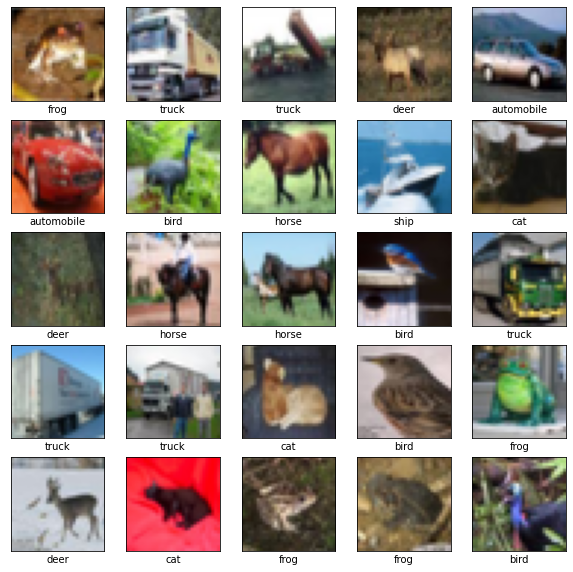

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

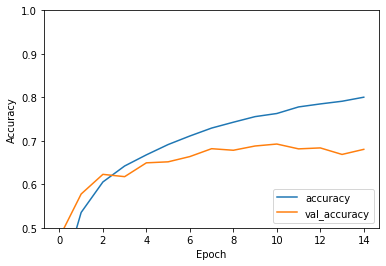

In [9]:
#item4
#from_future_import absolute_import,division,print_function,unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) # C32
model.add(layers.MaxPooling2D((2,2))) # doing the max pooling(2x2)
model.add(layers.Conv2D(64,(3,3),activation='relu')) #C64
model.add(layers.MaxPooling2D((2,2))) # doing the max pooling(2x2)
model.add(layers.Conv2D(64,(3,3),activation='relu')) #C64
model.add(layers.MaxPooling2D((2,2))) # doing the max pooling(2x2)
model.add(layers.Flatten()) 
model.add(layers.Dense(64,activation='relu')) #F64
model.add(layers.Dense(10)) #F10
                        
print(model.summary())
train_labels_cato=tf.keras.utils.to_categorical( train_labels, num_classes=10, dtype='float32')
test_labels_cato=tf.keras.utils.to_categorical( test_labels, num_classes=10, dtype='float32')
opt=tf.keras.optimizers.SGD(learning_rate=1.4e-2,momentum=0.9) # SGD (with momentum) optimizer                        
model.compile(optimizer=opt,loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])   
print(test_images.shape)
print(test_labels.shape)
print(train_images.shape)
print(train_labels.shape)
print(train_labels_cato.shape)
print(test_labels_cato.shape)
history=model.fit(train_images,train_labels_cato,batch_size=50,epochs=15,validation_data=(test_images,test_labels_cato))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc=model.evaluate(test_images,test_labels_cato,verbose=2)
train_loss,train_acc=model.evaluate(train_images,train_labels_cato,verbose=2)
print('test loss=',test_loss)
print('test accuracy=',test_acc)
print('train loss=',train_loss)
print('train accuracy=',train_acc)

